#### Cyclistic : How Does a Bike-Share Navigate Speedy Success?

Initial R code source:
This analysis is for case study 1 from the Google Data Analytics Certificate (Cyclistic). It is originally based on the case study https://artscience.blog/home/divvy-dataviz-case-study written by Kevin Hartman. The R code has been adapted for use with updated data and file formats.

#### Install and load necessary packages

In [1]:
install.packages('tidyverse')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
install.packages('lubridate')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
install.packages('hms')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
install.packages('data.table')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
install.packages("modeest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [6]:
install.packages("openxlsx")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [7]:
library(dplyr)
library(ggplot2)
library(modeest)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Registered S3 method overwritten by 'rmutil':
  method         from
  print.response httr



In [8]:
#load libraries 
library(tidyverse) #calculations
library(lubridate) #dates 
library(hms) #time
library(data.table)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.1     ✔ tidyr     1.3.0
✔ readr     2.1.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘hms’


The following object is masked from ‘package:lubridate’:

    hms



Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following object is masked from ‘package:purrr’:

    transpose


The following objects are masked from ‘package:dplyr’:

    between, first, last




In [9]:
library(openxlsx)

#### Ask
###### Indentify the business task
The key business task in this case is to discover how casual riders and Cyclistic members use their rental bikes differently. Both the Director of Marketing as well as finance analysts have concluded that annual members are more profitable.

Therefore, the results of this analysis will be used to design a new marketing strategy to convert casual riders to annual members.

###### Consider key stakeholders.
Key stakeholders include: Cyclistic executive team, Director of Marketing (Lily Moreno), Marketing Analytics team.

#### Prepare
Download data and store it appropriately.
Data has been downloaded from Motivate International Inc. Local copies have been stored securely on Google Drive and here on Kaggle.

Identify how it’s organized.
All trip data is in comma-delimited (.CSV) format with 15 columns, including: ride ID #, ride type, start/end time, ride length (in minutes), day of the week, starting point (code, name, and latitude/longitude), ending point (code, name, and latitude/longitude), and member/casual rider.

Determine the credibility of the data.
Due to the fact that this is a case study using public data, we are going to assume the data is credible.

#### Process
Check the data for errors.
The code chunk below will import 12 individual .xlsx files as data frames, each representing 1 of the last 12 months of trip data. Some parsing errors persist, however, they represent less 0.25% of the data set, so this is still a representative sample.

In [10]:
y2022_08 <- read.csv('/kaggle/input/case-study-cyclicist/case study/aug22.csv')

In [11]:
y2022_09 <- read.csv('/kaggle/input/case-study-cyclicist/case study/sep22.csv')

In [12]:
y2022_10 <- read.csv('/kaggle/input/case-study-cyclicist/case study/oct22.csv')

In [13]:
y2022_11 <- read.csv('/kaggle/input/case-study-cyclicist/case study/nov22.csv')

In [14]:
y2022_12 <- read.csv('/kaggle/input/case-study-cyclicist/case study/dec22.csv')

In [15]:
y2023_01 <- read.csv('/kaggle/input/case-study-cyclicist/case study/jan23.csv')

In [16]:
y2023_02 <- read.csv('/kaggle/input/case-study-cyclicist/case study/feb 23.csv')

In [17]:
y2023_03 <- read.csv('/kaggle/input/case-study-cyclicist/case study/march23.csv')

In [18]:
y2023_04 <- read.csv('/kaggle/input/case-study-cyclicist/case study/apr23.csv')

In [19]:
y2023_05 <- read.csv('/kaggle/input/case-study-cyclicist/case study/may 23.csv')

In [20]:
y2023_06 <- read.csv('/kaggle/input/case-study-cyclicist/case study/june23.csv')

In [21]:
y2023_07<- read.csv('/kaggle/input/case-study-cyclicist/case study/july23.csv')

1 column was added to each of the 12 monthly .CSV files:

Day of the week (1 = Sunday, 7 = Saturday)

In [22]:
#calculate the day of the week 
y2022_08 $day_of_week <- wday(y2022_08 $started_at)
y2022_09 $day_of_week <- wday(y2022_09 $started_at)
y2022_10 $day_of_week <- wday(y2022_10 $started_at)
y2022_11 $day_of_week <- wday(y2022_11 $started_at)
y2022_12 $day_of_week <- wday(y2022_12 $started_at)
y2023_01 $day_of_week <- wday(y2023_01 $started_at)
y2023_02 $day_of_week <- wday(y2023_02 $started_at)
y2023_03 $day_of_week <- wday(y2023_03 $started_at)
y2023_04 $day_of_week <- wday(y2023_04 $started_at)
y2023_05 $day_of_week <- wday(y2023_05 $started_at)
y2023_06 $day_of_week <- wday(y2023_06 $started_at)
y2023_07 $day_of_week <- wday(y2023_07 $started_at)

In [23]:
head(y2022_08)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day_of_week
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
1,954144C2F67B1932,classic_bike,2022-07-05 08:12:47,2022-07-05 08:24:32,Ashland Ave & Blackhawk St,13224,Kingsbury St & Kinzie St,KA1503000043,41.90707,-87.66725,41.88918,-87.63851,member,3
2,292E027607D218B6,classic_bike,2022-07-26 12:53:38,2022-07-26 12:55:31,Buckingham Fountain (Temp),15541,Michigan Ave & 8th St,623,41.86962,-87.62398,41.87277,-87.62398,casual,3
3,57765852588AD6E0,classic_bike,2022-07-03 13:58:49,2022-07-03 14:06:32,Buckingham Fountain (Temp),15541,Michigan Ave & 8th St,623,41.86962,-87.62398,41.87277,-87.62398,casual,1
4,B5B6BE44314590E6,classic_bike,2022-07-31 17:44:21,2022-07-31 18:42:50,Buckingham Fountain (Temp),15541,Woodlawn Ave & 55th St,TA1307000164,41.86962,-87.62398,41.79526,-87.59647,casual,1
5,A4C331F2A00E79E0,classic_bike,2022-07-13 19:49:06,2022-07-13 20:15:24,Wabash Ave & Grand Ave,TA1307000117,Sheffield Ave & Wellington Ave,TA1307000052,41.89147,-87.62676,41.93625,-87.65266,member,4
6,579D73BE2ED880B3,electric_bike,2022-07-01 17:04:35,2022-07-01 17:13:18,Desplaines St & Randolph St,15535,Clinton St & Roosevelt Rd,WL-008,41.88461,-87.64456,41.86712,-87.64109,member,6


#### Document the cleaning process.


Day of the week (1 = Sunday, 7 = Saturday) column is added in to the all 12 
CSV files.

#### Analyze
Aggregating data so it’s useful and accessible.
This code chunk will combine the 12 individual data frames into one large data frame for analysis.

In [24]:
all_trips_init <- bind_rows(
                       y2022_08, 
                       y2022_09, 
                       y2022_10, 
                       y2022_11, 
                       y2022_12, 
                       y2023_01, 
                       y2023_02, 
                       y2023_03, 
                       y2023_04, 
                       y2023_05, 
                       y2023_06, 
                       y2023_07, 
                       )

In [25]:
head(all_trips_init)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day_of_week
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
1,954144C2F67B1932,classic_bike,2022-07-05 08:12:47,2022-07-05 08:24:32,Ashland Ave & Blackhawk St,13224,Kingsbury St & Kinzie St,KA1503000043,41.90707,-87.66725,41.88918,-87.63851,member,3
2,292E027607D218B6,classic_bike,2022-07-26 12:53:38,2022-07-26 12:55:31,Buckingham Fountain (Temp),15541,Michigan Ave & 8th St,623,41.86962,-87.62398,41.87277,-87.62398,casual,3
3,57765852588AD6E0,classic_bike,2022-07-03 13:58:49,2022-07-03 14:06:32,Buckingham Fountain (Temp),15541,Michigan Ave & 8th St,623,41.86962,-87.62398,41.87277,-87.62398,casual,1
4,B5B6BE44314590E6,classic_bike,2022-07-31 17:44:21,2022-07-31 18:42:50,Buckingham Fountain (Temp),15541,Woodlawn Ave & 55th St,TA1307000164,41.86962,-87.62398,41.79526,-87.59647,casual,1
5,A4C331F2A00E79E0,classic_bike,2022-07-13 19:49:06,2022-07-13 20:15:24,Wabash Ave & Grand Ave,TA1307000117,Sheffield Ave & Wellington Ave,TA1307000052,41.89147,-87.62676,41.93625,-87.65266,member,4
6,579D73BE2ED880B3,electric_bike,2022-07-01 17:04:35,2022-07-01 17:13:18,Desplaines St & Randolph St,15535,Clinton St & Roosevelt Rd,WL-008,41.88461,-87.64456,41.86712,-87.64109,member,6


Next, we add columns to list the date, month, day, and year of each ride for additional aggregation capabilities.

In [26]:
## ----Add columns that list the date, month, day, and year of each ride for additional aggregation----
all_trips_init$date <- as.Date(all_trips_init$started_at)
all_trips_init$month <- format(as.Date(all_trips_init$date), "%m")
all_trips_init$day <- format(as.Date(all_trips_init$date), "%d")
all_trips_init$year <- format(as.Date(all_trips_init$date), "%Y")
all_trips_init$day_of_week <- format(as.Date(all_trips_init$date), "%A")

In [27]:
head(all_trips_init)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day_of_week,date,month,day,year
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<date>,<chr>,<chr>,<chr>
1,954144C2F67B1932,classic_bike,2022-07-05 08:12:47,2022-07-05 08:24:32,Ashland Ave & Blackhawk St,13224,Kingsbury St & Kinzie St,KA1503000043,41.90707,-87.66725,41.88918,-87.63851,member,Tuesday,2022-07-05,07,05,2022
2,292E027607D218B6,classic_bike,2022-07-26 12:53:38,2022-07-26 12:55:31,Buckingham Fountain (Temp),15541,Michigan Ave & 8th St,623,41.86962,-87.62398,41.87277,-87.62398,casual,Tuesday,2022-07-26,07,26,2022
3,57765852588AD6E0,classic_bike,2022-07-03 13:58:49,2022-07-03 14:06:32,Buckingham Fountain (Temp),15541,Michigan Ave & 8th St,623,41.86962,-87.62398,41.87277,-87.62398,casual,Sunday,2022-07-03,07,03,2022
4,B5B6BE44314590E6,classic_bike,2022-07-31 17:44:21,2022-07-31 18:42:50,Buckingham Fountain (Temp),15541,Woodlawn Ave & 55th St,TA1307000164,41.86962,-87.62398,41.79526,-87.59647,casual,Sunday,2022-07-31,07,31,2022
5,A4C331F2A00E79E0,classic_bike,2022-07-13 19:49:06,2022-07-13 20:15:24,Wabash Ave & Grand Ave,TA1307000117,Sheffield Ave & Wellington Ave,TA1307000052,41.89147,-87.62676,41.93625,-87.65266,member,Wednesday,2022-07-13,07,13,2022
6,579D73BE2ED880B3,electric_bike,2022-07-01 17:04:35,2022-07-01 17:13:18,Desplaines St & Randolph St,15535,Clinton St & Roosevelt Rd,WL-008,41.88461,-87.64456,41.86712,-87.64109,member,Friday,2022-07-01,07,01,2022


We also remove any unnecessary columns (erroneous ride_length, latitude/longitude fields).

In [28]:
all_trips_init <- all_trips_init %>% 
  select(-c( start_lat, start_lng, end_lat, end_lng))

We'll add another column to calculate each ride length in seconds.

In [29]:
all_trips_init$ride_length <- as.numeric(difftime(all_trips_init$ended_at,all_trips_init$started_at))

Let's next remove the NA rows.

In [30]:
all_trips_no_na <- drop_na(all_trips_init)

In [31]:
null_count <- sum(sapply(all_trips_init, is.null))

In [32]:
print(null_count)

[1] 0


The aggregated data frame includes approximately 10,500 entries (0.30% of total rides) when bikes were taken out of docks and checked for quality by Cyclistic or ride_length was negative. We will create a new version of the data frame since data is being removed.

In [33]:
## ----Remove negative ride length and quality check rows---------------------
all_trips <- all_trips_no_na[!(all_trips_no_na$start_station_name == "HQ QR" | all_trips_no_na$ride_length<0),]

In [34]:
str(all_trips)

'data.frame':	5779337 obs. of  15 variables:
 $ ride_id           : chr  "954144C2F67B1932" "292E027607D218B6" "57765852588AD6E0" "B5B6BE44314590E6" ...
 $ rideable_type     : chr  "classic_bike" "classic_bike" "classic_bike" "classic_bike" ...
 $ started_at        : chr  "2022-07-05 08:12:47" "2022-07-26 12:53:38" "2022-07-03 13:58:49" "2022-07-31 17:44:21" ...
 $ ended_at          : chr  "2022-07-05 08:24:32" "2022-07-26 12:55:31" "2022-07-03 14:06:32" "2022-07-31 18:42:50" ...
 $ start_station_name: chr  "Ashland Ave & Blackhawk St" "Buckingham Fountain (Temp)" "Buckingham Fountain (Temp)" "Buckingham Fountain (Temp)" ...
 $ start_station_id  : chr  "13224" "15541" "15541" "15541" ...
 $ end_station_name  : chr  "Kingsbury St & Kinzie St" "Michigan Ave & 8th St" "Michigan Ave & 8th St" "Woodlawn Ave & 55th St" ...
 $ end_station_id    : chr  "KA1503000043" "623" "623" "TA1307000164" ...
 $ member_casual     : chr  "member" "casual" "casual" "casual" ...
 $ day_of_week       : chr  "

Perform calculations.
Let's first look at a statistical summary of the aggregated and transformed data frame. Let's also look at the structure of the columns.

In [35]:
summary(all_trips)
str(all_trips)

   ride_id          rideable_type       started_at          ended_at        
 Length:5779337     Length:5779337     Length:5779337     Length:5779337    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
 start_station_name start_station_id   end_station_name   end_station_id    
 Length:5779337     Length:5779337     Length:5779337     Length:5779337    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            

'data.frame':	5779337 obs. of  15 variables:
 $ ride_id           : chr  "954144C2F67B1932" "292E027607D218B6" "57765852588AD6E0" "B5B6BE44314590E6" ...
 $ rideable_type     : chr  "classic_bike" "classic_bike" "classic_bike" "classic_bike" ...
 $ started_at        : chr  "2022-07-05 08:12:47" "2022-07-26 12:53:38" "2022-07-03 13:58:49" "2022-07-31 17:44:21" ...
 $ ended_at          : chr  "2022-07-05 08:24:32" "2022-07-26 12:55:31" "2022-07-03 14:06:32" "2022-07-31 18:42:50" ...
 $ start_station_name: chr  "Ashland Ave & Blackhawk St" "Buckingham Fountain (Temp)" "Buckingham Fountain (Temp)" "Buckingham Fountain (Temp)" ...
 $ start_station_id  : chr  "13224" "15541" "15541" "15541" ...
 $ end_station_name  : chr  "Kingsbury St & Kinzie St" "Michigan Ave & 8th St" "Michigan Ave & 8th St" "Woodlawn Ave & 55th St" ...
 $ end_station_id    : chr  "KA1503000043" "623" "623" "TA1307000164" ...
 $ member_casual     : chr  "member" "casual" "casual" "casual" ...
 $ day_of_week       : chr  "

Let's next focus on the average length of each ride, this time in minutes. We see that on average, each ride is close to 30 minutes. We'll then break that down by casual riders versus members.

In [36]:
summary(all_trips$ride_length)/60

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    0.00     5.52     9.70    18.34    17.32 41387.25 

Looking at casual riders versus members, we can see that the average casual ride is about 27.7 minutes compared to the members' average ride of 12.3 minutes. The median rides are 12 minutes and 8 minutes respectively.

In [37]:
aggregate(all_trips$ride_length/60 ~ all_trips$member_casual, FUN = mean)
aggregate(all_trips$ride_length/60 ~ all_trips$member_casual, FUN = median)

all_trips$member_casual,all_trips$ride_length/60
<chr>,<dbl>
casual,27.73020
member,12.38322


all_trips$member_casual,all_trips$ride_length/60
<chr>,<dbl>
casual,12.00
member,8.55


In [38]:
aggregate(all_trips$day_of_week ~ all_trips$member_casual, FUN = mfv)

all_trips$member_casual,all_trips$day_of_week
<chr>,<chr>
casual,Saturday
member,Wednesday


Also, we can take a look at the average ride time by day for members and casual riders with duration again in minutes. Regardless of day of the week, casual users ride 2.7x to 3x longer than members, with both groups riding longer on weekends.

In [39]:
all_trips$day_of_week <- ordered(all_trips$day_of_week, levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))
aggregate(all_trips$ride_length/60 ~ all_trips$member_casual + all_trips$day_of_week, FUN = mean)

all_trips$member_casual,all_trips$day_of_week,all_trips$ride_length/60
<chr>,<ord>,<dbl>
casual,Sunday,32.77978
member,Sunday,13.66823
casual,Monday,27.17645
member,Monday,11.76759
casual,Tuesday,24.20324
member,Tuesday,11.83683
casual,Wednesday,23.25603
member,Wednesday,11.82553
casual,Thursday,23.26094


In [40]:
all_trips %>%
  mutate(weekday_num = lubridate::wday(started_at)) %>%
  mutate(weekday_label = case_when(
    weekday_num == 1 ~ "Sun",
    weekday_num == 2 ~ "Mon",
    weekday_num == 3 ~ "Tue",
    weekday_num == 4 ~ "Wed",
    weekday_num == 5 ~ "Thu",
    weekday_num == 6 ~ "Fri",
    weekday_num == 7 ~ "Sat",
    TRUE ~ NA_character_
  )) %>%
  group_by(member_casual, weekday_label) %>%
  summarise(number_of_rides = n(), average_duration = mean(ride_length/60)) %>%
  arrange(member_casual, weekday_label)

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


member_casual,weekday_label,number_of_rides,average_duration
<chr>,<chr>,<int>,<dbl>
casual,Fri,347107,26.91559
casual,Mon,253085,27.17645
casual,Sat,459983,32.35848
casual,Sun,351385,32.77978
casual,Thu,298278,23.26094
casual,Tue,257098,24.20324
casual,Wed,277263,23.25603
member,Fri,518876,12.30995
member,Mon,477618,11.76759


##### Identify trends and relationships.
Here are some key observations using the simple analyses above:

Casual riders average longer rides than members. This makes sense as members are likely using the bike rental service for particular commutes (i.e. work or school) whereas casual riders are just that--casual (perhaps they are sightseeing)


The number of rides for both types of users starts off slow on Mondays, gradually increases to a peak on Saturdays with a small drop off on Sundays.

#### Share

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


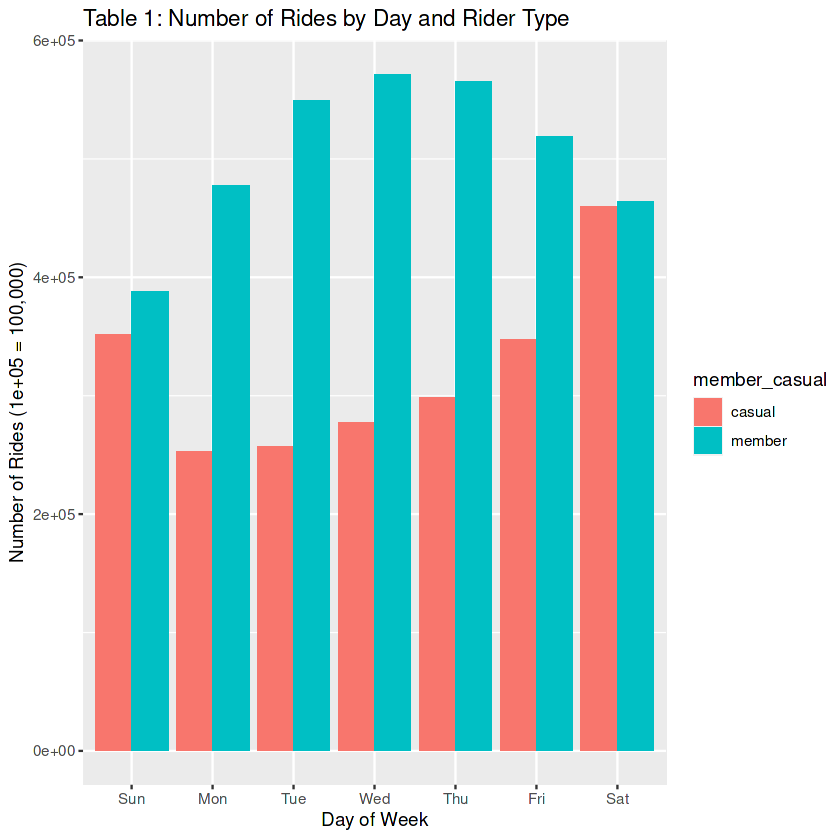

In [41]:
## ----Number of rides by rider type------------------------------------------
all_trips %>%
  mutate(weekday = factor(wday(started_at), 
                          levels = 1:7,
                          labels = c("Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"))) %>%
  group_by(member_casual, weekday) %>%
  summarise(number_of_rides = n(),
            average_duration = mean(ride_length)) %>%
  arrange(member_casual, weekday) %>%
  ggplot(aes(x = weekday, y = number_of_rides, fill = member_casual)) +
  geom_col(position = "dodge") +
  labs(title = "Table 1: Number of Rides by Day and Rider Type",
       y = "Number of Rides (1e+05 = 100,000)",
       x = "Day of Week")

Saturdays emerged as the day with the highest ride count for casual riders, whereas wednesday claimed the record for member riders’ most frequent day of riding.

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


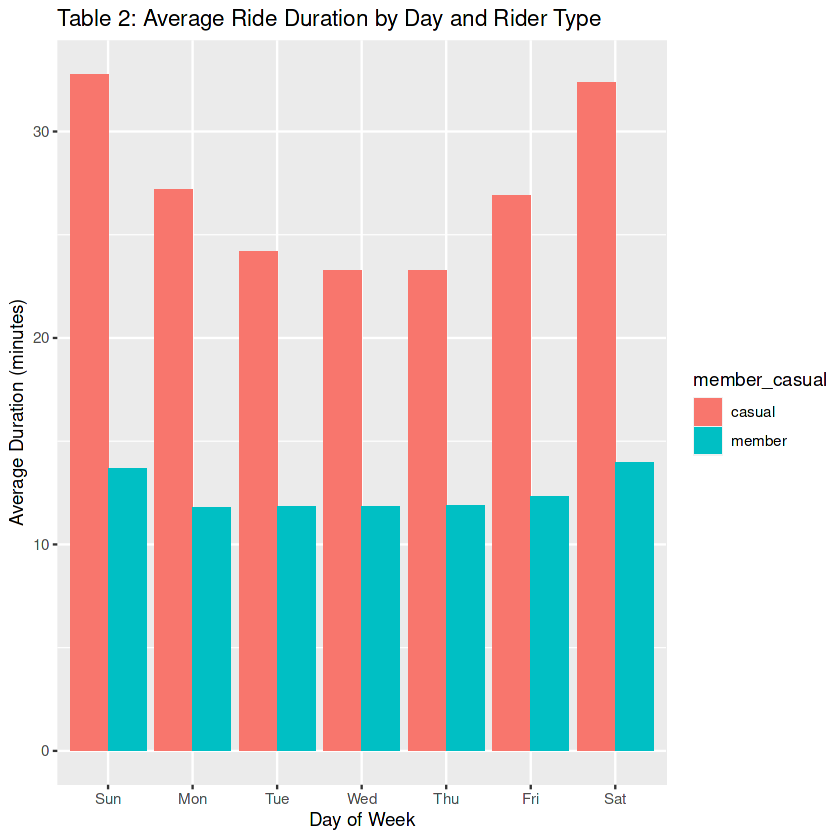

In [42]:
## ----Average duration-------------------------------------------------------
all_trips %>% 
  mutate(weekday = factor(wday(started_at), 
                          levels = 1:7,
                          labels = c("Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"))) %>%
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length/60)) %>% 
  arrange(member_casual, weekday)  %>% 
  ggplot(aes(x = weekday, y = average_duration, fill = member_casual)) +
  geom_col(position = "dodge") + 
  labs(title = "Table 2: Average Ride Duration by Day and Rider Type") + 
  ylab("Average Duration (minutes)") + 
  xlab("Day of Week")

There was a notable difference of six hundred thousand in the count of rides between registered member riders and casual riders. Interestingly, despite this, casual riders surpassed member riders in terms of ride duration, spending over twice the amount of time on their rides. Furthermore, the weekly average for maximum ride length among casual riders significantly exceeded that of member riders.

`summarise()` has grouped output by 'rideable_type'. You can override using the
`.groups` argument.


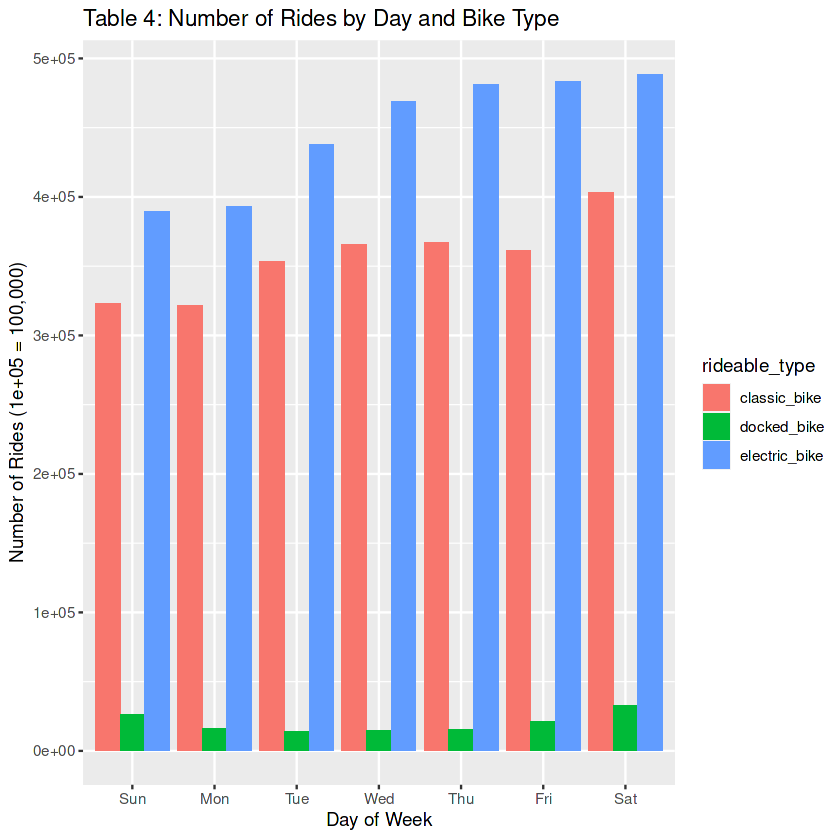

In [43]:
## ----Number of rides by day and bike type-----------------------------------
all_trips %>% 
  mutate(weekday = factor(wday(started_at), 
                          levels = 1:7,
                          labels = c("Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"))) %>% 
  group_by(rideable_type, weekday) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(rideable_type, weekday)  %>% 
  ggplot(aes(x = weekday, y = number_of_rides, fill = rideable_type)) +
  geom_col(position = "dodge") + 
  labs(title = "Table 4: Number of Rides by Day and Bike Type") + 
  ylab("Number of Rides (1e+05 = 100,000)") + 
  xlab("Day of Week")

The electric bike type has a considerably higher number of rides when compared to both the classic bike and the docked bike, which has a significantly lower ride count. 

Throughout the recorded duration, the classic bike stood out as the most prevalent type of rideable. Interestingly, both member riders and casual riders favored the classic bike for their rides. Notably, member riders opted not to utilize the docked bike at any point during this period.

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


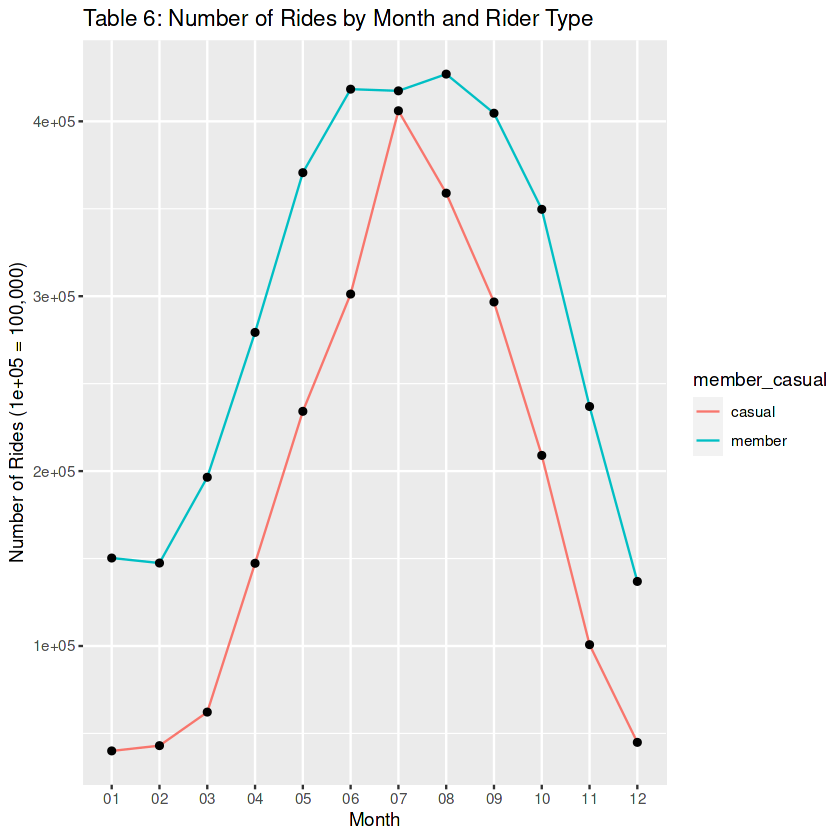

In [44]:
## ----Number of rides by month and rider type--------------------------------
all_trips %>% 
  group_by(member_casual, month) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(member_casual, month)  %>% 
  ggplot(aes(x = month, y = number_of_rides, group = member_casual)) +
  geom_line(aes(color = member_casual)) + 
  geom_point() +
  labs(title = "Table 6: Number of Rides by Month and Rider Type") + 
  ylab("Number of Rides (1e+05 = 100,000)") + 
  xlab("Month")

In terms of peak riding activity, casual riders reached their highest point in July, whereas member riders observed their peak during August. Conversely, both categories of riders experienced their lowest activity of the year in January.

### Here is a summary of the key observations from above:

Casual riders have notably longer average ride durations compared to members.

Saturdays are the preferred riding day for casual riders, while Wednesdays are popular among members.

Casual riders tend to ride more on weekends, whereas members have consistent riding patterns throughout the week.

On any given day, casual riders' rides are significantly longer than those of members.

Despite 600,000 more rides by casual riders, they spend more than twice the time on their rides compared to members.

Electric bikes are the most popular, followed by classic bikes, while docked bikes have fewer rides.

Classic bikes are favored by both member and casual riders, with no member rides on docked bikes.

Peak riding activity occurs in July for casual riders and in August for members, with low activity in January.

### Act
#### top three recommendations based on your analysis
Weekend-Only Membership: Consider introducing a weekend-only membership option at a different price point than the full annual membership. This targeted membership would allow casual users to unlock bikes exclusively on Fridays, Saturdays, and Sundays. This strategy aligns with casual riders' weekend-oriented riding patterns, potentially enticing them to transition to a full annual membership for more flexibility during the week.

"See Our City" Campaign: Launch a "See Our City" campaign specifically aimed at casual users. This campaign could include 52 suggested bike routes covering all major sights in the city, with one route for each weekend of the year. By renting bikes for these curated routes, casual riders could explore the city's attractions over the course of a year while also enjoying cost savings compared to individual rentals. This campaign could encourage frequent weekend riders to commit to a full annual membership.

Summer Marketing Emphasis: Ensure that marketing campaigns are timed to coincide with the peak riding activity, which is in the summer. Consider launching promotional offers, discounts, or special events during the summer months to attract both casual riders and members. Highlight the benefits of riding during this season, such as pleasant weather and longer daylight hours, to encourage increased ridership and membership conversions.

These recommendations leverage the observed differences in riding behavior between casual users and members to tailor marketing strategies that could enhance user engagement, loyalty, and membership conversion.